## Dataset and Problem Introduction

In this analysis, we explore a linear regression model to predict the sales price for houses in the city of Ames, Iowa, the United States from 2006 to 2010.

Data Source: https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627
<br>Reference: https://dataquest.io/

## Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999
%matplotlib inline
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

data = pd.read_csv('datasets/AmesHousing.tsv', delimiter = '\t')
data.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


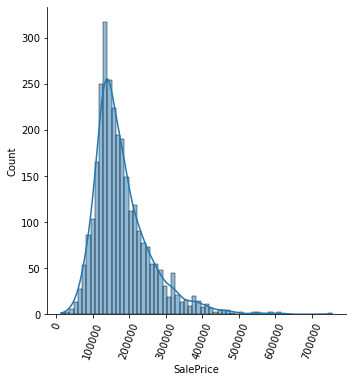

In [2]:
ax = sns.displot(data['SalePrice'],kde= True)
plt.xticks(rotation=70)
plt.show()

The above distribution plot for the Sale Price column is skewed to the right so the modelling may not be useful for higher priced houses.

## Main Functions
Functions to **transform**, **select features** and then **train and test** using the linear regression model.

In [3]:
def transform_features(df):
    return df

def select_features(df):
    return df[['Gr Liv Area','SalePrice']]

def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    target = 'SalePrice'
    features = numeric_train.columns.drop(target)    
    
    #Train
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train[target])
    
    #Test and calculate error
    predictions = lr.predict(test[features])    
    mse = mean_squared_error(test[target], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

transformed_df = transform_features(data)
selected_df = select_features(transformed_df)
rmse = train_and_test(selected_df)
rmse

57088.25161263909

## Feature Engineering

- Handle missing values:
    - All columns:
        - Drop any with 5% or more missing values **for now**.
    - Text columns:
        - Drop any with 1 or more missing values **for now**.
    - Numerical columns:
        - For columns with missing values, fill in with the most common value in that column.

In [4]:
#drop columns with more than 5% missing values
number_missing = data.isnull().sum()
drop_columns = number_missing[number_missing > (0.05)*len(data)].index
data = data.drop(columns = drop_columns)
data.shape

(2930, 71)

In [5]:
#drop text columns with missing values
number_text_missing = data.select_dtypes(include = ['object']).isnull().sum().sort_values(ascending=False) 
drop_columns = number_text_missing[number_text_missing >0].index
data = data.drop(columns = drop_columns)
data.shape

(2930, 64)

In [6]:
#For numerical columns with missing values, fill in with the most common value
mode_values = data.mode().iloc[0]
data = data.fillna(data.mode().iloc[0])

## Creating new features
There are two columns that represent the year of construction (**Year Built**) and the year of remodelling (**Year Remod/Add**). To be able to use them in the modelling we make two new columns to show how many years have passed from the construction and remodelling.

In [7]:
data['year_since_built'] = data['Yr Sold'] - data['Year Built']
data['year_since_remodel'] = data['Yr Sold'] - data['Year Remod/Add']

## Drop rows with negative values for both of these new features
data = data.drop(index = [1702, 2180, 2181])

## Drop the original year columns
data = data.drop(columns = ["Year Built", "Year Remod/Add"])

## Drop columns that influence the analysis
- Columns not useful for machine learning.
- Columns that contains leaked data about the sale.

In [8]:
# Drop columns not useful for ML
data = data.drop(columns = ["PID", "Order"])

# Drop columns that leak info about the final sale
data = data.drop(columns = ["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"])

Update the **transform_features** function according to the above changes.

In [9]:
def transform_features(df):
    #drop columns with more than 5% missing values
    number_missing = df.isnull().sum()
    drop_columns = number_missing[number_missing > (0.05)*len(df)].index
    df = df.drop(columns = drop_columns)
    
    #Drop Text columns with missing values
    number_text_missing = df.select_dtypes(include = ['object']).isnull().sum().sort_values(ascending=False)
    drop_columns = number_text_missing[number_text_missing >0].index
    df = df.drop(columns = drop_columns)
    
    #Fill null values of numerical columns with the most common value
    mode_values = df.mode().iloc[0]
    df = df.fillna(df.mode().iloc[0])
    
    #Create new features
    df['year_since_built'] = df['Yr Sold'] - df['Year Built']
    df['year_since_remodel'] = df['Yr Sold'] - df['Year Remod/Add']
    # Drop rows with negative values for both of these new features
    df = df.drop(index = [1702, 2180, 2181])
    # Drop the original year columns
    df = df.drop(columns = ["Year Built", "Year Remod/Add"])
    
    # Drop columns not useful for ML
    df = df.drop(columns = ["PID", "Order"])

    # Drop columns that leak info about the final sale
    df = df.drop(columns = ["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"])

    return df

data = pd.read_csv("datasets/AmesHousing.tsv", delimiter="\t")
transformed_df = transform_features(data)
selected_df = select_features(transformed_df)
rmse = train_and_test(selected_df)
rmse

55275.367312413066

## Feature selection
We first calculate the correlation coefficients for the columns and filter absolute values greater than 0.3.

In [10]:
corr_coefficients = abs(transformed_df.corr()['SalePrice']).sort_values(ascending = False)
corr_coefficients[corr_coefficients>0.3]

SalePrice             1.000000
Overall Qual          0.801206
Gr Liv Area           0.717596
Garage Cars           0.648361
Total Bsmt SF         0.644012
Garage Area           0.641425
1st Flr SF            0.635185
year_since_built      0.558979
Full Bath             0.546118
year_since_remodel    0.534985
Mas Vnr Area          0.506983
TotRms AbvGrd         0.498574
Fireplaces            0.474831
BsmtFin SF 1          0.439284
Wood Deck SF          0.328183
Open Porch SF         0.316262
Name: SalePrice, dtype: float64

The most correlated feature is Overall Qual.

In [11]:
correlated_cols = corr_coefficients[corr_coefficients>0.3].index
transformed_df[correlated_cols].head(5)

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,Garage Area,1st Flr SF,year_since_built,Full Bath,year_since_remodel,Mas Vnr Area,TotRms AbvGrd,Fireplaces,BsmtFin SF 1,Wood Deck SF,Open Porch SF
0,215000,6,1656,2.0,1080.0,528.0,1656,50,1,50,112.0,7,2,639.0,210,62
1,105000,5,896,1.0,882.0,730.0,896,49,1,49,0.0,5,0,468.0,140,0
2,172000,6,1329,1.0,1329.0,312.0,1329,52,1,52,108.0,6,0,923.0,393,36
3,244000,7,2110,2.0,2110.0,522.0,2110,42,2,42,0.0,8,2,1065.0,0,0
4,189900,5,1629,2.0,928.0,482.0,928,13,2,12,0.0,6,1,791.0,212,34


<AxesSubplot:>

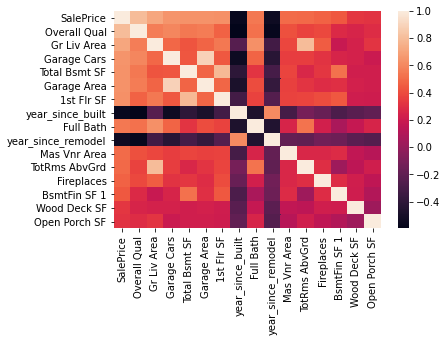

In [12]:
corrmat = transformed_df[correlated_cols].corr()
sns.heatmap(corrmat)

Based on the correlation matrix heatmap, we can tell that the following pairs of columns are strongly correlated:
- **Gr Liv Area** and **TotRms AbvGrd**
- **Garage Area** and **Garage Cars**
Looking at the [data documentation](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt), we can tell that each pair of columns reflects very similar information. Because Gr Liv Area and Garage Area are continuous variables that capture more nuance, we drop the **TotRms AbvGrd** and **Garage Cars**.

In [13]:
transformed_df = transformed_df.drop(columns = ['TotRms AbvGrd', 'Garage Cars'])

## Categorical columns
All of the columns that can be categorized as nominal variables are candidates for being converted to categorical.

We make sure that these columns belong to the transformed columns and also drop the columns with more than 10 unique values.

In [14]:
#List of nominal columns according to the documentation
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

#Make the list of nomial features that belongs to transformed_df 
transformed_cat_cols = list(set(nominal_features).intersection(set(transformed_df.columns)))
transformed_cat_cols

['Street',
 'Exterior 1st',
 'MS SubClass',
 'Roof Matl',
 'Bldg Type',
 'Roof Style',
 'MS Zoning',
 'Neighborhood',
 'Land Contour',
 'House Style',
 'Exterior 2nd',
 'Heating',
 'Condition 1',
 'Lot Config',
 'Condition 2',
 'Central Air',
 'Foundation']

In [15]:
#Remove the columns with more than 10 unique values
for col in transformed_cat_cols:
    if len(transformed_df[col].value_counts()) > 10:
        transformed_cat_cols.remove(col)
        transformed_df = transformed_df.drop(columns = [col])
transformed_cat_cols

['Street',
 'MS SubClass',
 'Roof Matl',
 'Bldg Type',
 'Roof Style',
 'MS Zoning',
 'Land Contour',
 'House Style',
 'Heating',
 'Condition 1',
 'Lot Config',
 'Condition 2',
 'Central Air',
 'Foundation']

We now see which categorical columns have few unique values and where more than 95% of the values in the column belong to a specific category. These columns would be similar to **low variance** numerical features (no variability in the data for the model to capture).

In [16]:
#Find low variance columns
num_rows = len(transformed_df)
low_variance_cols = []
for col in transformed_cat_cols:
    unique_values = transformed_df[col].value_counts()
    for value in unique_values:
        if value > 0.95*num_rows:
            low_variance_cols.append(col)
            break
            
low_variance_cols

['Street', 'Roof Matl', 'Heating', 'Condition 2']

In [17]:
#Drop low variance columns
for col in low_variance_cols:
    transformed_cat_cols.remove(col)
transformed_df = transformed_df.drop(columns = low_variance_cols)
transformed_cat_cols

['MS SubClass',
 'Bldg Type',
 'Roof Style',
 'MS Zoning',
 'Land Contour',
 'House Style',
 'Condition 1',
 'Lot Config',
 'Central Air',
 'Foundation']

In [18]:
#Change the type of the transformed_cat_cols columns to category
for col in transformed_cat_cols:
    transformed_df[col] = transformed_df[col].astype('category')
    
# Create dummy columns and add back to the dataframe!
transformed_df = pd.concat([
    transformed_df, 
    pd.get_dummies(transformed_df.select_dtypes(include=['category']))
], axis=1).drop(transformed_cat_cols,axis=1)

Now we update again the select_features function according to the above findings.

In [19]:
def select_features(df):
    
    #Remove strongly correlated columns
    df = df.drop(columns = ['TotRms AbvGrd', 'Garage Cars'])
    
    #List of nominal columns according to the documentation
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    #Make the list of nomial features that belongs to df 
    transformed_cat_cols = list(set(nominal_features).intersection(set(df.columns)))
    
    #Remove the columns with more than 10 unique values
    for col in transformed_cat_cols:
        if len(df[col].value_counts()) > 10:
            transformed_cat_cols.remove(col)
            df = df.drop(columns = [col])
            
    #Find and remove low variance columns
    num_rows = len(df)
    low_variance_cols = []
    for col in transformed_cat_cols:
        unique_values = df[col].value_counts()
        for value in unique_values:
            if value > 0.95*num_rows:
                low_variance_cols.append(col)
                break
    for col in low_variance_cols:
        transformed_cat_cols.remove(col)
    df = df.drop(columns = low_variance_cols)
    
    #Change the type of the transformed_cat_cols columns to category
    for col in transformed_cat_cols:
        df[col] = df[col].astype('category')

    # Create dummy columns and add back to the dataframe!
    df = pd.concat([
        df, 
        pd.get_dummies(df.select_dtypes(include=['category']))
    ], axis=1).drop(transformed_cat_cols,axis=1)

    return df

data = pd.read_csv("datasets/AmesHousing.tsv", delimiter="\t")
transformed_df = transform_features(data)
selected_df = select_features(transformed_df)
rmse = train_and_test(selected_df)
rmse

62619.13092030264

## Control the type of Cross Validation
We now add a parameter named k to the train_and_test function that controls the type of cross validation that occurs.

- When **k** equals **0**, perform **holdout validation** (what we already implemented)
- When **k** equals **1**, perform **simple cross validation**
- When **k** is greater than 0, perform **k-fold cross validation** 

In [20]:
def train_and_test(df, k = 0):
    target = 'SalePrice'
    features = df.select_dtypes(include=['integer', 'float']).columns.drop(target)
    lr = linear_model.LinearRegression()
    std_rmse = 0
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        #Train
        lr.fit(train[features], train[target])

        #Test and calculate error
        predictions = lr.predict(test[features])    
        mse = mean_squared_error(test[target], predictions)
        rmse = np.sqrt(mse)
    elif k == 1:
        np.random.seed(1)
        shuffled_df = df.sample(frac=1, )
        fold_one = df[:1460]
        fold_two = df[1460:]        
        
        #Train fold_one and test on fold_two        
        lr.fit(fold_one[features], fold_one[target])
        predictions = lr.predict(fold_two[features])    
        mse = mean_squared_error(fold_two[target], predictions)
        rmse_12 = np.sqrt(mse)
        
        #Train fold_two and test on fold_one        
        lr.fit(fold_two[features], fold_two[target])
        predictions = lr.predict(fold_one[features])    
        mse = mean_squared_error(fold_one[target], predictions)
        rmse_21 = np.sqrt(mse)
        
        rmse = (rmse_12 + rmse_21)/2
    else:
        kf = KFold(k, shuffle=True, random_state=1) 
        mses = cross_val_score(lr, df[features], df[target], scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
        rmse = np.mean(rmses)
        std_rmse = np.std(rmses)
        predictions = cross_val_predict(lr, df[features], df[target], cv = kf)
        
    return rmse, std_rmse, predictions

df = pd.read_csv("datasets/AmesHousing.tsv", delimiter="\t")
transformed_df = transform_features(df)
selected_df = select_features(transformed_df)
rmse, std, predictions = train_and_test(selected_df, k=4)

rmse

30576.155584727203

Train and test using different k to figure out which k may have better results.

In [21]:
rmses = []
stds = []
for k in range(0,12):
    rmse, std, p = train_and_test(selected_df, k=k)
    rmses.append(rmse)
    stds.append(std)
rmses

[62619.13092030264,
 45886.2858298585,
 30777.667998636065,
 30428.3819424869,
 30576.155584727203,
 30238.331217118197,
 30147.347663089797,
 30217.459197743883,
 30197.053006461447,
 30088.09578475078,
 29979.47394611935,
 29912.845833580188]

In [22]:
stds

[0,
 0,
 2377.5052792007373,
 3547.905991172336,
 4619.253587909724,
 5538.100128352948,
 6166.8442830635495,
 5944.6238847537425,
 6300.553566122645,
 6644.163321548968,
 7119.304659794577,
 7389.714720092929]

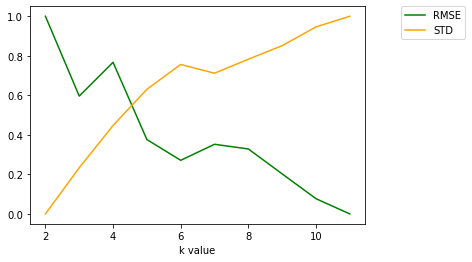

In [23]:
#Get the result of k-fold cross validation
rmses_2= rmses[2:]
stds_2 = stds[2:]
x = range(2, 12)
#RMSE
y = (rmses_2 - min(rmses_2))/(max(rmses_2) - min(rmses_2))
plt.plot(x,y, label = 'RMSE', color='green')
plt.xlabel('k value')

#STD
y = (stds_2 - min(stds_2))/(max(stds_2) - min(stds_2))
plt.plot(x,y, label = 'STD', color='orange')
plt.legend(bbox_to_anchor=(1.3,1), borderaxespad=0)

The goal is to get the lowest possible RMSE and STD (which are at a trade-off). Looking at the above plot, the best k seems to be 4.

We can also examine the error (the difference between predictions and the real values) graphically when k value is 4.

Text(0.5, 1.0, 'Distribution of Error for k = 4')

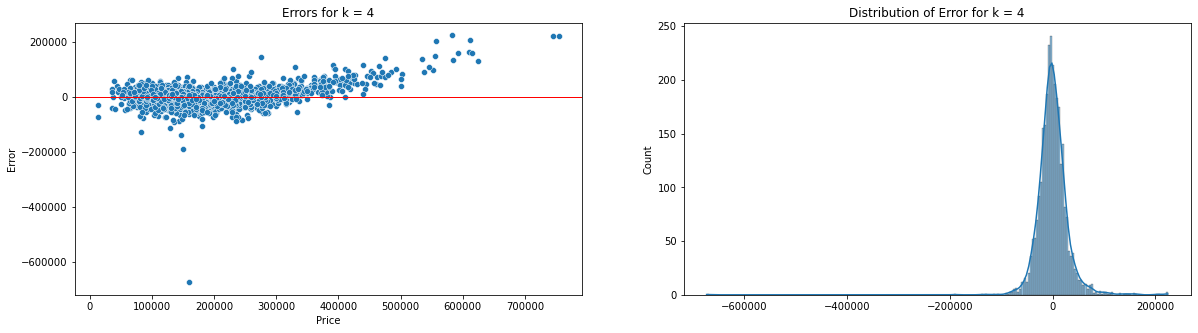

In [24]:
#Scatter plot
fig, axes = plt.subplots(ncols=2, figsize=(20,5))
x = selected_df['SalePrice']
y = np.array(selected_df['SalePrice']) - np.array(predictions)
sns.scatterplot(x = x, y = y, ax = axes[0])
axes[0].axhline(linewidth=1, color='r')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Error')
axes[0].set_title('Errors for k = 4')
sns.histplot(y, ax = axes[1], kde=True)
axes[1].set_title('Distribution of Error for k = 4')

The above error plots show that the predictions are more accurate for the cheaper houses (less than $400,000).

## Conclusion

In this project, **feature engineering** and **feature selection** techniques were used to make and select the features for a Linear Regression Model. For the modelling hold out, simple, and cross validations with the Linear Regression model were used to train and test the dataset. 

The best result was been achieved using k-fold cross validation with 4 folds.